# MALIS Lab Session 4 - Fall 2021
## Deadline January 14

**Group :** pronestiblias

**Massimiliano Pronesti, Federico Tiblias**

The aim of this lab session is to practice with decision trees for classification and then comparing different classification algorithms.

This lab is divided into 3 parts:
1. Implementing the decision tree structure
2. Test the decision tree structure
3. Compare different classification algorithms on the same dataset

Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. We strongly encourage the addition of plots and visual representations to the report, bearing in mind that comments on graphical data are still necessary. Code for adding images to your notebook: ```<img src="path/to/image.png" />```.

Submit your complete notebook or an html version of it after execution.

<h1 id='intro'>Introduction</h1>

The first two parts of this lab session are based on the mushrooms dataset that can be found at https://archive.ics.uci.edu/ml/datasets/mushroom. Data come from *Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms* (1981) by G. H. Lincoff. This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. **The Guide clearly states that there is no simple rule for determining the edibility of a mushroom**.

You will use the following attributes to classify mushrooms between edible and poisonous.

<table>
    <tbody>
        <tr>
            <th><p>Attributes</p></th>
            <th><p>Possible Values</p></th>
            <th><p>Nb Values</p></th>
        </tr>
        <tr>
            <td><p>class</p></td>
            <td><p>edible=e,poisonous=p</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>cap-shape</p></td>
            <td><p>bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s</p></td>
            <td><p>6</p></td>
        </tr>
        <tr>
            <td><p>cap-surface</p></td>
            <td><p>fibrous=f,grooves=g,scaly=y,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>cap-color</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y</p></td>
            <td><p>10</p></td>
        </tr>
        <tr>
            <td><p>bruises?</p></td>
            <td><p>bruises=t,no=f</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>odor</p></td>
            <td><p>almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>gill-attachment</p></td>
            <td><p>attached=a,descending=d,free=f,notched=n</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>gill-spacing</p></td>
            <td><p>close=c,crowded=w,distant=d</p></td>
            <td><p>3</p></td>
        </tr>
        <tr>
            <td><p>gill-size</p></td>
            <td><p>broad=b,narrow=n</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>gill-color</p></td>
            <td><p>black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y</p></td>
            <td><p>12</p></td>
        </tr>
        <tr>
            <td><p>stalk-shape</p></td>
            <td><p>enlarging=e,tapering=t</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>stalk-root</p></td>
            <td><p>bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?</p></td>
            <td><p>7</p></td>
        </tr>
        <tr>
            <td><p>stalk-surface-above-ring</p></td>
            <td><p>fibrous=f,scaly=y,silky=k,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>stalk-surface-below-ring</p></td>
            <td><p>fibrous=f,scaly=y,silky=k,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>stalk-color-above-ring</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>stalk-color-below-ring</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>veil-type</p></td>
            <td><p>partial=p,universal=u</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>veil-color</p></td>
            <td><p>brown=n,orange=o,white=w,yellow=y</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>ring-number</p></td>
            <td><p>none=n,one=o,two=t</p></td>
            <td><p>3</p></td>
        </tr>
        <tr>
            <td><p>ring-type</p></td>
            <td><p>cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z</p></td>
            <td><p>8</p></td>
        </tr>
        <tr>
            <td><p>spore-print-color</p></td>
            <td><p>black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>population</p></td>
            <td><p>abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y</p></td>
            <td><p>6</p></td>
        </tr>
        <tr>
            <td><p>habitat</p></td>
            <td><p>grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d</p></td>
            <td><p>7</p></td>
        </tr>
    </tbody>
</table>

All the questions that will be asked in your decision trees will be in the form "is (ATTRIBUTE) equal to (VALUE)?". Therefore, you will have a total number of 126 possible questions. We divide the dataset into a training set of size 7124 and a test set of size 1000.

In the first part, you will have to complete missing parts of a code implementing decision trees. In the second part, you will make some experiments on the Mushrooms dataset.

First of all, please run the following cell to import relevant libraries, classes and functions.

In [30]:
print_solutions=False

import math
import random
import matplotlib.pyplot as plt
import numpy as np
from utils import Dataset, Sample, Tree, equals, import_data, accuracy
log2 = lambda x: 0 if x <= 0 else math.log(x, 2)

## Part 1: Implementing Decision Trees

In this lab, you will work with the Sample, Dataset and Tree classes. The Sample class represents a mushroom. Its attribute "is_positive" will be True when the mushroom is edible and False if it is poisonous. The Dataset class represents a set of mushrooms. The Tree class actually represents a node of a Decision Tree. We strongly advise you to have a look at these classes (in the utils.py file) to understand well how they work.

**Question 1**
    
Implement the *compute_entropy()* function and read the *split()* function of the Dataset class.

In [31]:
def compute_entropy(self):
    '''
    Computes the fraction of edible mushrooms in a dataset
        p_poisonous + p_edible = 1
    
        p_edible is the percentage of edible mushrooms
        p_poisonous is the percentage of poisonous ones
    
    With those computed probabilities the function computes the entropy of a set of mushrooms:
    entropy =  -p_edible*log2(p_edible) -p_poisonous*log2(p_poisonous) if there are samples in the dataset
    entropy = 0 if there are no samples
    
    INPUTS :
    - self which contains
        - self.len : the lenth in samples of a dataset
        - self.data : a set of length self.len and which contains elements of class Sample
            to address the elements in self.data use a loop (e.g for element in self.data : ...)
            the Sample class contains the attribute is_positive which is True if that sample is edible
            (using previous for loop do element.is_positive to see if that element is edible)
            
    
    OUTPUTS : 
    - entropy : a numerical value
    '''
    
    ###################### YOUR CODE ###################
    if not self.len: # case of empty dataset
        return 0

    p_edible = len([x for x in self.data if x.is_positive])/self.len # p_i=|S_i|/|S|
    return -( p_edible * log2(p_edible) + (1 - p_edible) * log2(1 - p_edible))
    ################### END YOUR CODE ##################


Dataset.compute_entropy = compute_entropy

In [32]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part1.py

In [33]:
def split(self, attribute, value, function):
    """
    Split a dataset into two datasets (pos_set and neg_set) according to a question on a particular attribute and value

    Given a sample x in self.data, answer the question is function(x.attributes[attribute], value).
    If the answer is positive, x is added to pos_set, otherwise to neg_set
    """
    if not self.len: # If the dataset is empty, we return default values
        return set(), set(), 0.
    
    pos_set=set()
    neg_set=set()
    
    for x in self.data:
        if function(x.attributes[attribute], value):
            pos_set.add(x)
        else:
            neg_set.add(x)
            
    pos_set=Dataset(pos_set)
    neg_set=Dataset(neg_set)
    
    
    split_entropy = len(pos_set)/self.len*pos_set.compute_entropy()+len(neg_set)/self.len*neg_set.compute_entropy()
    return pos_set, neg_set, split_entropy

Dataset.split = split

<h1>Part 2: Detecting edible mushrooms</h1>

In this part you will run your code on the Mushrooms dataset. First of all, run the following cell to import data.

In [34]:
train_set, test_set, questions_set = import_data()
print(len(train_set), len(test_set))

7124 1000


<h4>Question 2</h4>
Run the following cell to build a decision tree of depth 1 based on the Mushrooms training dataset. What is the most informing question to ask?

In [35]:
tree = Tree(questions_set, Dataset(train_set), 1)
print(tree)

(odor equals n? Entropy gain = 0.76)
	---> True (p_positive = 96.37 %)
	---> False (p_positive = 4.03 %)



<h4>Your answer</h4>
The random tree algorithm separates samples based on feature values, starting from the one split that leads to the best reduction in entropy for a given node. A tree with height = 1 therefore makes a single split based on the "most important" parameter.

The first feature chosen by the tree is `odor equals n`. According to the [introductory table](#intro) the attribute `odor` has 9 possible values, where `n` corresponds to `none`. Therefore, the above query refers to the edibility of odorless mushrooms, resulting in 96.37% of odorless mashrooms edible and 4.03 % (sum not being 100% because of approximation).

Indeed we observe that this is a very informing question as it has high entropy gain.

<h4>Question 3</h4>
Now run the following cell to build decision trees of maximum depth 0 to 8 and plot their accuracies and maximum depths. What do you notice? Explain your observations.

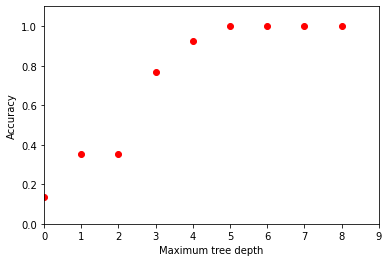

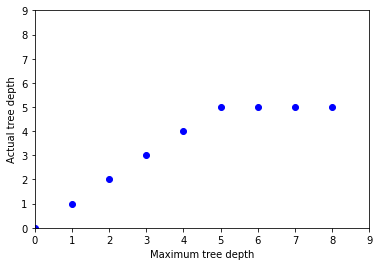

In [36]:
trees = [Tree(questions_set, Dataset(train_set), i) for i in range(9)]
accuracies = [accuracy(trees[i], test_set) for i in range(9)]
depths = [trees[i].get_size() for i in range(9)]

plt.plot(list(range(9)), accuracies, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Maximum tree depth')
plt.axis([0, 9, 0, 1.1])
plt.show()

plt.plot(list(range(9)), depths, 'bo')
plt.ylabel('Actual tree depth')
plt.xlabel('Maximum tree depth')
plt.axis([0, 9, 0, 9])
plt.show()

<h4>Your answer</h4>

Judging from the above plots, we can state that the increasing the maximum depth of the decision tree won't increase the accuracy any further from level 5 onwards.
Thereby, a decision tree of depth 5 is sufficient to perfectly classify mushrooms.

#### Question 4

For the following you will work with a tree of depth 5. Run the following cell to build it and print it.

Which questions can actually be useful to ask to detect the edibility of a mushroom?


In [37]:
tree = Tree(questions_set, Dataset(train_set), 5)
print(tree)

(odor equals n? Entropy gain = 0.76)
	(spore-print-color equals r? Entropy gain = 0.11)
		---> False (p_positive = 0.0 %)
		(stalk-surface-below-ring equals y? Entropy gain = 0.07)
			(population equals y? Entropy gain = 0.86)
				---> True (p_positive = 100.0 %)
				---> False (p_positive = 0.0 %)
			(gill-size equals b? Entropy gain = 0.01)
				---> True (p_positive = 100.0 %)
				(bruises equals f? Entropy gain = 0.35)
					---> True (p_positive = 100.0 %)
					---> False (p_positive = 0.0 %)
	(bruises equals f? Entropy gain = 0.11)
		---> False (p_positive = 0.0 %)
		(stalk-root equals c? Entropy gain = 0.39)
			---> True (p_positive = 100.0 %)
			(stalk-surface-below-ring equals y? Entropy gain = 0.27)
				---> True (p_positive = 100.0 %)
				(habitat equals d? Entropy gain = 0.24)
					---> True (p_positive = 100.0 %)
					---> False (p_positive = 0.0 %)



<h4>Your answer</h4>

The tree already selected those questions for us: by building a tree deep enough so that all leaves correctly predict a label we obtain the queries we need.

From the above execution results, they are:
- `odor equals n?`
- `spore-print-color equals r?`
- `stalk-surface-below-ring equals y?`
- `ring-number equals o?`
- `gill-size equals n?`
- `population equals c?`
- `bruises equals f?`
- `stalk-root equals c?`
- `stalk-root equals r?`
- `gill-spacing equals w?`

Their order is given by the tree structure printed above, with more relevant questions asked higher in the tree.


<h1>Part 3: Comparison of classifiers</h1>

In this part you will compare the classification algorithms seen in this and the previous labs of MALIS course:

1. K nearest neighbors
2. Logistic regression
3. Neural Networks
4. Support Vector Machine (linear)
5. SVM with RBF kernel
6. Classification Tree

You have only to run the cells and answer the questions you can find after the code

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore")
from sklearn.exceptions import ConvergenceWarning

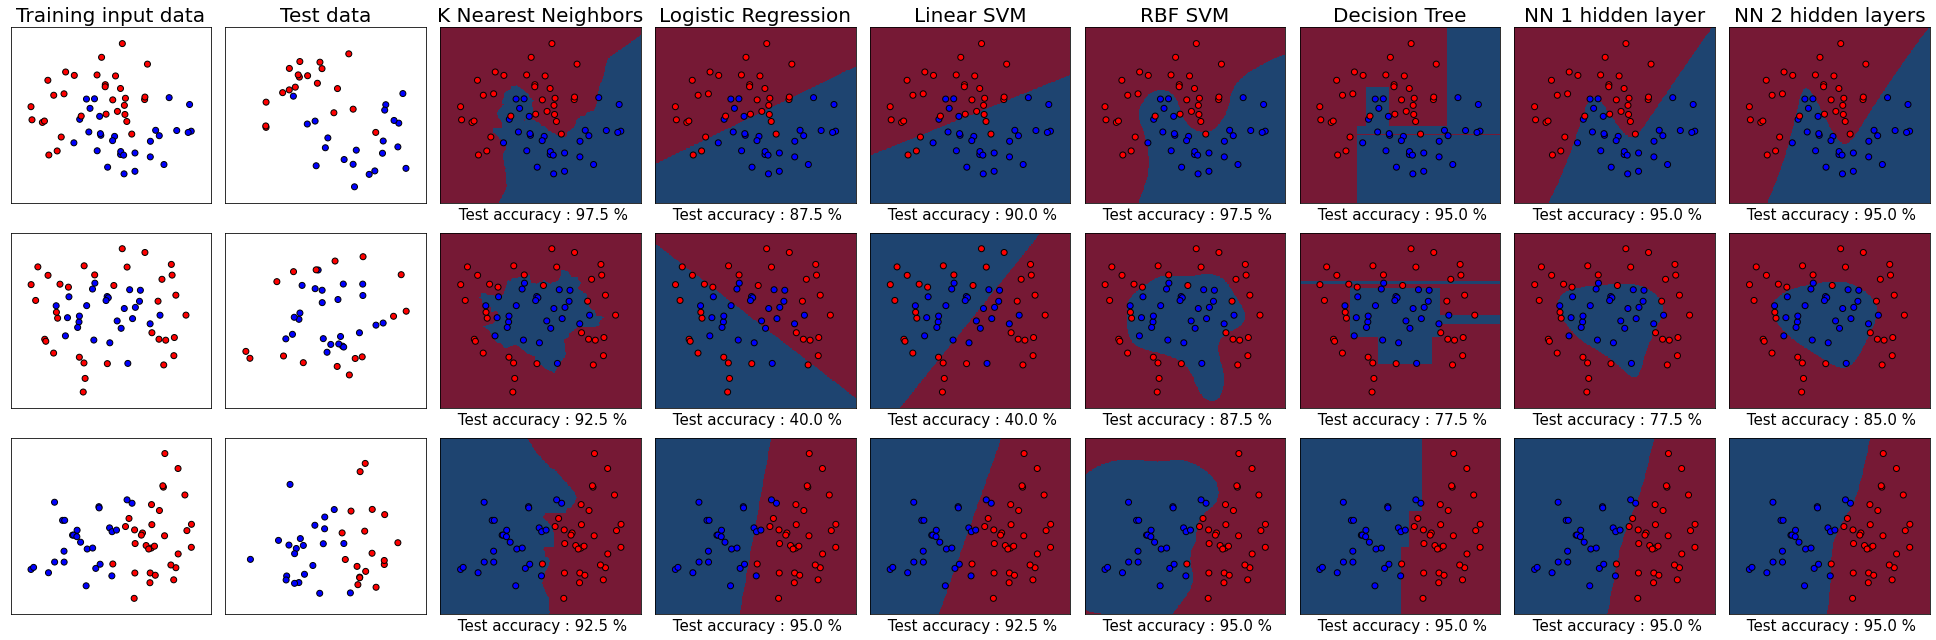

In [39]:
# The following code is note done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(10), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=-10.),
    MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(10, 10), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=-10.)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

#### Question 5

Comment the results obtained. Use the following questions to help you.
1. Which classifiers performs poorly? In which datasets? Why?
2. Do you think some classifiers are overfitting?
    1. If yes: which ones? in which datasets? which elements allow you to say that?
    2. If no : what you should see to say that a classifier is overfitting?
3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)

#### Your answer

* Answer 5.1:
  - In the first dataset the classes are completely separated by a curved line. For this reason, most of the models attained high scores as separable data is a favorable scenario. However, we can see that K-NN, RBF SVM, Decision Tree and the Neural Networks performed better than the Logistic Regression and the Linear SVM, as the latter ones have decision boundaries limited to an hyperplane, making it hard to adapt to the real curved boundaries.
  - In the second dataset, the decision boundary is curved and radial, hence both Linear Regression and Linear SVM perform poorly as they will surely miss almost half of the data.
   The decision tree and the Neural Networks also struggle to perform well as the tree will have difficulties to create the boundaries with only straight lines. Also, the Neural Networks won't be able to adapt to a full circle well, unless given enough hidden layers.
   The KNN, on the other hand, is performing well since it very easily predicts the blue class as its members are compacted and grouped in the center.
  - In the third dataset the decision boundary is an almost straight line. For this reason, every model performs well enough. Models able to fit a nonlinear boundary show slightly better performances.


* Answer 5.2:
  - As regards the first dataset, none of the models seems to overfit the data as the "smooth" boundaries and the high test scores suggest, but overfitting may happen if we see that boundaries are being unnaturally stretched to fit some "exceptional" point
  - As for the second dataset, we notice that the decision boundary for the tree is really stretched out to include the blue point on the top which is a sign of overfitting as many red points in the same y-axis of this point will be unfairly classified as blue. Same for the right part of the decision boundary. Following this very same idea, we can state that the KNN and RBF SVM are overfitting the data as well. KNN in particular seem to have a very jagged decision boundary, while we would expect a smoother one.
  - As regards the third dataset, from the linear separability claim on answer 5.1, it follows that the KNN and the RBF SVM overfit the data, while LR, LSVM, decision tree and NNs don't, as they keep a smooth decision boundary.

* Answer 5.3:
The bigger `k` becomes  in the KNN, the smoother the decision boundary becomes and thus the higher gets the score.
The hardness of the SVM allow the model to accept more or less errors of misclassification. However, being too hard impacts negatively on the margin while maximizing the margin will impact negatively on the misclassificiation errors. By performing some manual tuning on the hyperparameters of RBF SVM, KNN and trees we find the following set of parameters that performs well enough and should avoid overfitting:
  - `KNeighborsClassifier: K = 10`
  - `SVC: gamma='auto', C=2`
  - `DecisionTreeClassifier: max_depth=4, max_leaf_nodes=7`

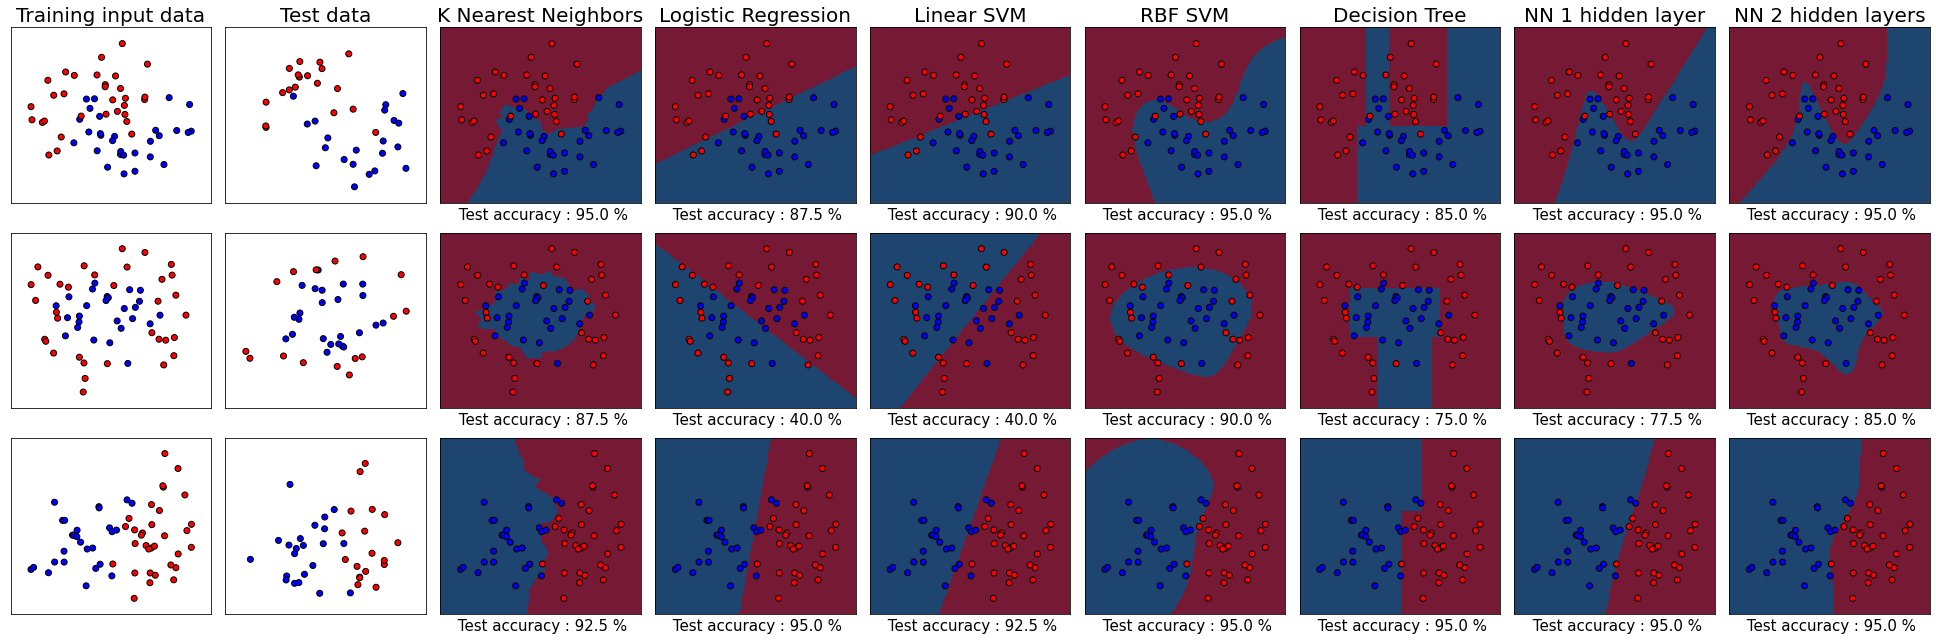

In [40]:
# The following code is note done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM",
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(10),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma='auto', C=2),
    DecisionTreeClassifier(max_depth=4,max_leaf_nodes=7),
    MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(10), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=-10.),
    MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(10, 10), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=-10.)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1

    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)

        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()